In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("cpp_data.csv")

In [5]:
np.std(data.x)

6.023553203695885e-08

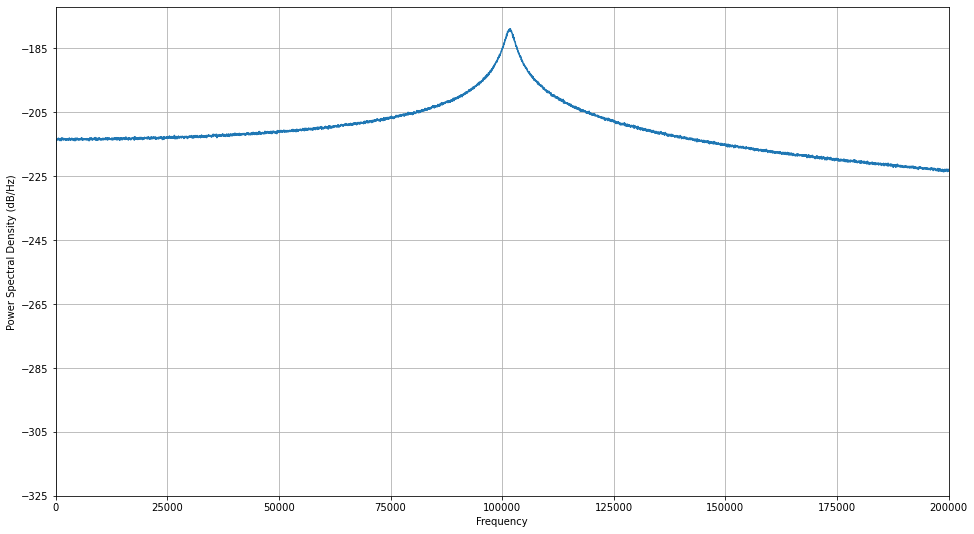

In [30]:
plt.figure(figsize=(16,9))
plt.psd(data.x, Fs=1e6, NFFT=2**15)
plt.xlim((0,200e3))
plt.show()

In [10]:
kBT = 1.38e-23 * 300
radius = 72e-9
density = 1850
mass = (4*np.pi/3)*radius*radius*radius*density

In [14]:
0.5*mass*(2*np.pi*120e3)**2*np.std(data.x)**2

2.983015853358628e-21

In [74]:
np.std(data.x)

6.20769723118276e-08

In [18]:
0.5*mass*np.std(data.v)**2

1.8672156886789755e-21

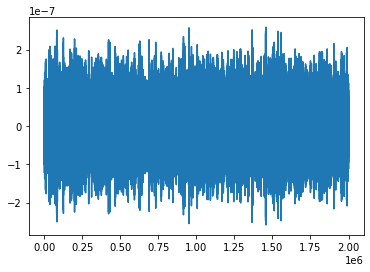

In [76]:
plt.plot(data.x)

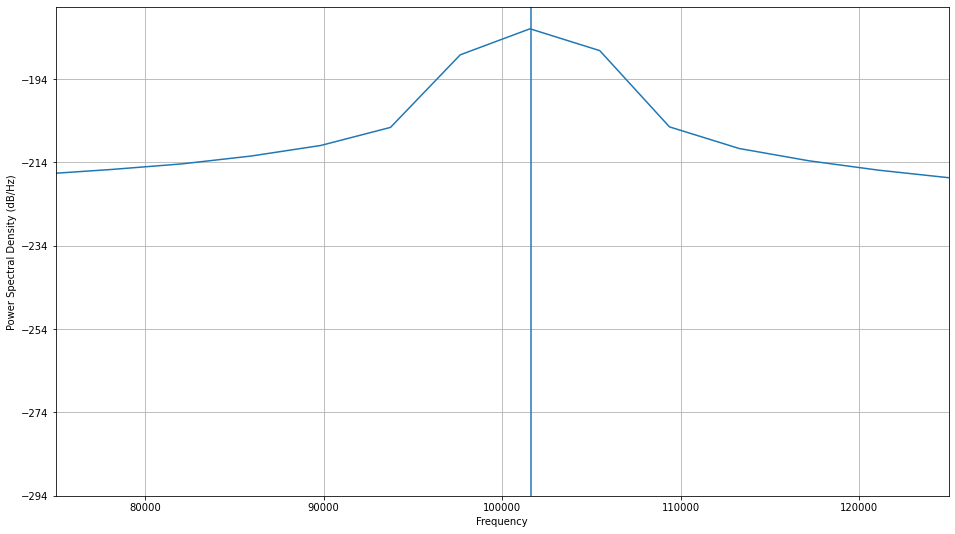

In [41]:
data = pd.read_csv("cpp_data_1.csv")
plt.figure(figsize=(16,9))
plt.psd(data.x, Fs=1e6)
plt.xlim((75e3,125e3))
plt.axvline(101.6e3)
plt.show()

In [39]:
mass*(2*np.pi*101.6e3)**2*np.std(data.x)**2

4.5421977031365706e-21

In [40]:
kBT

4.14e-21

In [42]:
mass*np.std(data.v)**2

3.966044008833149e-21

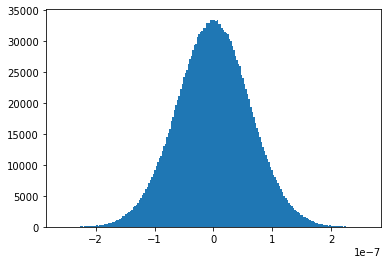

In [53]:
ys, xs, _ = plt.hist(data.x, bins=200)
plt.show()

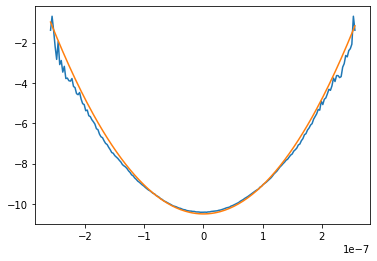

In [71]:
plt.plot(xs[:-1], -np.log(ys))
plt.plot(xs[:-1], 0.5/kBT*mass*(2*np.pi*101.6e3)**2*xs[:-1]**2-10.5)

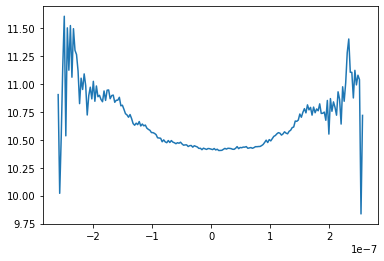

In [72]:
plt.plot(xs[:-1], 0.5/kBT*mass*(2*np.pi*101.6e3)**2*xs[:-1]**2 + np.log(ys) )

Comparing the PSDs of the particle under different pressures and whatnot to see how stuff like the amplitude of the particle is affected. The pressures are:
- 1 mbar
- 3 mbar
- 10 mbar
- 30 mbar
- 100 mbar
- 300 mbar
- 1000 mbar

Or a roughly log-scale progression.

In [77]:
pressures = [1,3,10,30,100,300,1000]
datas = [pd.read_csv(f"cpp_data_{p}mbar.csv") for p in pressures] # a list of datasets


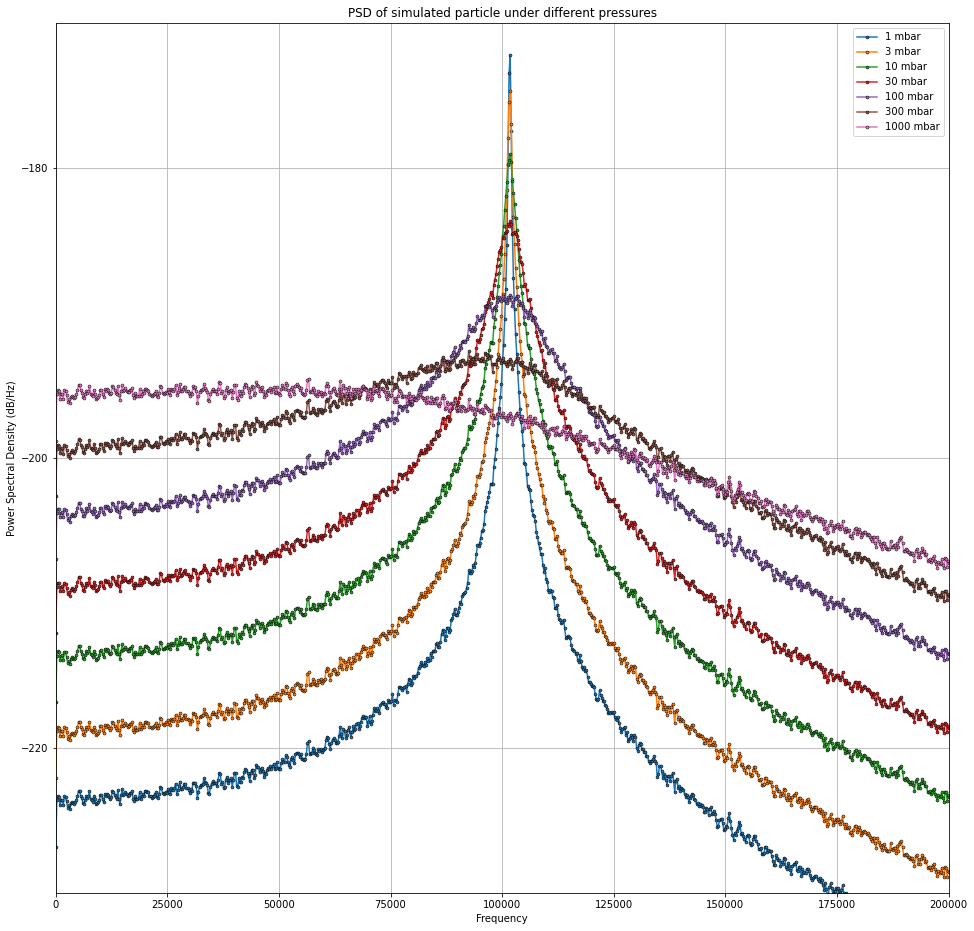

In [101]:
# plotting all the PSDs on top of each other
fs = 1/(datas[0].t.iloc[1] - datas[0].t.iloc[0])
plt.figure(figsize=(16,16))
plt.title("PSD of simulated particle under different pressures")
for d, p in zip(datas, pressures):
    plt.psd(d.x, Fs=fs, NFFT=2**12, label=f"{p} mbar", marker=".", mec="k", mew=0.5)

plt.xlim((0,200e3)) # cropping to 150 kHz
plt.ylim((-230, -170))
plt.legend()
plt.show()

| Pressure [mbar] 	| Amplitude [nm] 	|
| 1 			| 61.619374738599284 	|
| 3 			| 60.813929692587166 	|
| 10 			| 60.60105484157393 	|
| 30 			| 60.56709168196842 	|
| 100 			| 60.41576353145948 	|
| 300 			| 60.35906859257696 	|
| 1000 			| 60.324673650953635 	|


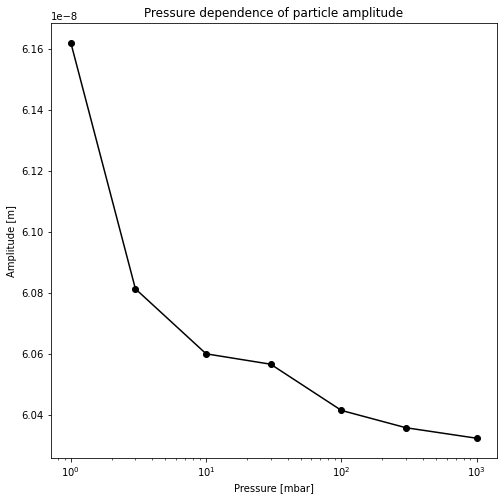

In [86]:
# comparing the amplitudes of their individual datasets
amps = []
print("| Pressure [mbar] \t| Amplitude [nm] \t|")
for d, p in zip(datas, pressures):
    amps += [np.std(d.x)]
    print("| {} \t\t\t| {} \t|".format(p, amps[-1]*1e9))
plt.figure(figsize=(8,8))
plt.semilogx(pressures, amps, marker="o", color="k")
plt.title("Pressure dependence of particle amplitude")
plt.xlabel("Pressure [mbar]")
plt.ylabel("Amplitude [m]")
plt.show()